In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
data=pd.read_csv('scholarship.csv')

In [9]:
df=data.copy()

In [10]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [11]:
df.shape

(1000, 3)

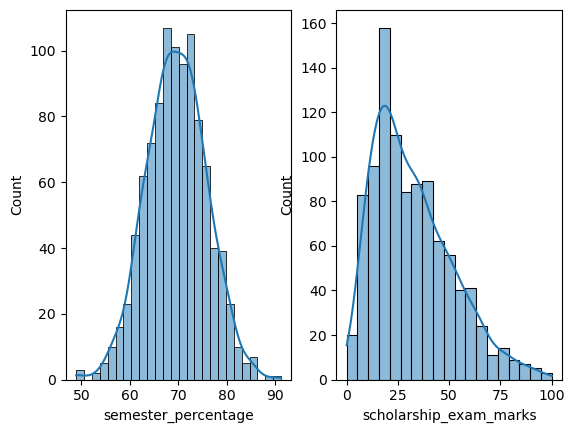

In [16]:
plt.subplot(1,2,1)
sns.histplot(df["semester_percentage"], kde=True)  # kde=True adds smooth curve

plt.subplot(1,2,2)
sns.histplot(df["scholarship_exam_marks"], kde=True)

plt.show()


In [20]:
mean=df["semester_percentage"].mean()
std=df["semester_percentage"].std()
mean,std

(np.float64(69.6124), 6.158978751323897)

In [24]:
Highest_allowed = mean + 3* std
Lowest_allowed =mean -3* std

In [25]:
print(Highest_allowed , "," , Lowest_allowed)

88.08933625397168 , 51.13546374602831


In [28]:
df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"] > Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## **Trimming**

In [30]:
df[(df["semester_percentage"]> Lowest_allowed) & (df["semester_percentage"] < Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## **Using Z-score**

In [51]:
data["z_score"] = (data["semester_percentage"]-data["semester_percentage"].mean())/data["semester_percentage"].std()

In [42]:
data[data["z_score"]<-3 ]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [43]:
data[data["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [44]:
data[(data["z_score"]>-3) & (data["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## **Capping**

In [48]:
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()

In [49]:
data["semester_percentage"] =np.where(data["semester_percentage"]>upper_limit,
         upper_limit,
         np.where(data["semester_percentage"]<lower_limit, lower_limit, data["semester_percentage"] ))

In [50]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,87.995636,44,1,3.099150
996,87.995636,65,1,3.505062
997,51.234334,34,0,-3.362960
998,86.200000,46,1,2.693239
